Exploratory Data Analysis (EDA) - Global Burden of Disease (GBD)
* Objectives of our projects are-
1) We are showing the top 10 reasons people die the most around the world.
2) We are checking how deaths have changed over the years for the major causes.
3) We are comparing deaths between males and females and in different countries.
4) We are looking at which risky things (like smoking or dirty air) cause more health problems.
5) We are showing how long people live in good health and how it has changed over time.
6) We are checking if males or females die more on average.
7) We are showing which causes take the biggest share of total deaths using a pie chart.





In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
filepath_1 = '/Users/ajaypunia/Desktop/Project_1_EDA/all_datasets/all_causes_mortality.csv'
df1 = pd.read_csv(filepath_1)
df1.head()

,measure_id,measure_name,location_id,location_name,sex_id,sex_name,age_id,age_name,metric_id,metric_name,year,val,upper,lower
0,26,Life expectancy,95081,Brazil South,1,Male,14,45-49 years,5,Years,1990,28.044554,28.144685,27.947558
1,26,Life expectancy,95081,Brazil South,2,Female,14,45-49 years,5,Years,1990,32.816574,32.913685,32.717113
2,26,Life expectancy,95081,Brazil South,1,Male,14,45-49 years,5,Years,1995,28.615823,28.709881,28.524302
3,26,Life expectancy,95081,Brazil South,2,Female,14,45-49 years,5,Years,1995,33.276096,33.365155,33.188232
4,26,Life expectancy,95081,Brazil South,1,Male,14,45-49 years,5,Years,2000,29.388277,29.473103,29.301392


In [11]:
df1.info()
print(df1.isnull().sum())
print(df1.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28440 entries, 0 to 28439
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   measure_id     28440 non-null  int64  
 1   measure_name   28440 non-null  object 
 2   location_id    28440 non-null  int64  
 3   location_name  28440 non-null  object 
 4   sex_id         28440 non-null  int64  
 5   sex_name       28440 non-null  object 
 6   age_id         28440 non-null  int64  
 7   age_name       28440 non-null  object 
 8   metric_id      28440 non-null  int64  
 9   metric_name    28440 non-null  object 
 10  year           28440 non-null  int64  
 11  val            28440 non-null  float64
 12  upper          28440 non-null  float64
 13  lower          28440 non-null  float64
dtypes: float64(3), int64(6), object(5)
memory usage: 3.0+ MB
measure_id       0
measure_name     0
location_id      0
location_name    0
sex_id           0
sex_name         0
age_id     

	•	Handle missing values (NaN)
	•	Remove duplicates
	•	Standardize column names if needed

In [13]:
df1 = df1.drop_duplicates()
df1.fillna(0, inplace=True)
df1.rename(columns={"measure_name": "Measure", "location_name": "Location"}, inplace=True)

In [14]:
df1["location_id"] = df1["location_id"].astype(str)
df1["year"] = df1["year"].astype(int)
df1["sex_id"] = df1["sex_id"].astype(str)
df1["age_id"] = df1["age_id"].astype(str)


print(df1.dtypes)

measure_id       int64
Measure         object
location_id     object
Location        object
sex_id          object
sex_name        object
age_id          object
age_name        object
metric_id        int64
metric_name     object
year             int64
val            float64
upper          float64
lower          float64
dtype: object


#saving cleaned and changed datasets to a specific folder

In [16]:
folder_path = "/Users/ajaypunia/Desktop/Project_1_EDA/changed_dataset"  
df1.to_csv(f"{folder_path}/cleaned_all_causes_mortality.csv", index=False)
print("File saved successfully in:", folder_path)

File saved successfully in: /Users/ajaypunia/Desktop/Project_1_EDA/changed_dataset


repeating changing to all data set files

In [18]:
df2 = pd.read_csv('/Users/ajaypunia/Desktop/Project_1_EDA/all_datasets/cause_name_injury.csv')
df2.head()

,measure_id,measure_name,location_id,location_name,sex_id,sex_name,age_id,age_name,cause_id,cause_name,metric_id,metric_name,year,val,upper,lower
0,1,Deaths,81,Germany,1,Male,1,<5 years,386,Nutritional deficiencies,1,Number,2000,0.508848,0.574275,0.450687
1,1,Deaths,81,Germany,2,Female,1,<5 years,386,Nutritional deficiencies,1,Number,2000,0.289087,0.324619,0.255397
2,1,Deaths,81,Germany,3,Both,1,<5 years,386,Nutritional deficiencies,1,Number,2000,0.797935,0.882307,0.715162
3,1,Deaths,81,Germany,1,Male,24,15-49 years,386,Nutritional deficiencies,1,Number,2000,3.734335,4.170872,3.329899
4,1,Deaths,81,Germany,2,Female,24,15-49 years,386,Nutritional deficiencies,1,Number,2000,1.721412,1.871912,1.593785


In [19]:
print(df2.columns)

Index(['measure_id', 'measure_name', 'location_id', 'location_name', 'sex_id',
       'sex_name', 'age_id', 'age_name', 'cause_id', 'cause_name', 'metric_id',
       'metric_name', 'year', 'val', 'upper', 'lower'],
      dtype='object')


In [20]:
df2 = df2[['location_id', 'year', 'sex_id', 'age_id', 'cause_name', 'val']]

In [21]:
df2.rename(columns={'val': 'val_injury_death'}, inplace=True)

In [22]:
df2['location_id'] = df2['location_id'].astype(str)
df2['year'] = df2['year'].astype(int)
df2['sex_id'] = df2['sex_id'].astype(str)
df2['age_id'] = df2['age_id'].astype(str)


In [23]:
folder_path = "/Users/ajaypunia/Desktop/Project_1_EDA/changed_dataset"  
df2.to_csv(f"{folder_path}/cleaned_causes_of_injury_or_deaths.csv", index=False)
print("File saved successfully in:", folder_path)

File saved successfully in: /Users/ajaypunia/Desktop/Project_1_EDA/changed_dataset


for health_adjusted_lifeexpectancy

In [25]:
df3 = pd.read_csv('/Users/ajaypunia/Desktop/Project_1_EDA/all_datasets/Health-adjusted life expectancy (HALE).csv')
df3.head()

,measure_id,measure_name,location_id,location_name,sex_id,sex_name,age_id,age_name,metric_id,metric_name,year,val,upper,lower
0,28,HALE (Healthy life expectancy),490,Western Cape,1,Male,19,70-74 years,5,Years,2000,7.342303,8.001562,6.572151
1,28,HALE (Healthy life expectancy),490,Western Cape,2,Female,19,70-74 years,5,Years,2000,8.506421,9.323826,7.571524
2,28,HALE (Healthy life expectancy),490,Western Cape,1,Male,34,2-4 years,5,Years,2000,54.157207,56.003132,52.158096
3,28,HALE (Healthy life expectancy),490,Western Cape,2,Female,34,2-4 years,5,Years,2000,58.235656,60.947785,55.358062
4,28,HALE (Healthy life expectancy),522,Republic of Sudan,1,Male,9,20-24 years,5,Years,2000,43.371236,46.235669,40.347186


In [26]:
df3["location_id"] = df3["location_id"].astype(str)
df3["year"] = df3["year"].astype(int)
df3["sex_id"] = df3["sex_id"].astype(str)
df3["age_id"] = df3["age_id"].astype(str)

print(df3.dtypes)

measure_id         int64
measure_name      object
location_id       object
location_name     object
sex_id            object
sex_name          object
age_id            object
age_name          object
metric_id          int64
metric_name       object
year               int64
val              float64
upper            float64
lower            float64
dtype: object


In [27]:
folder_path = "/Users/ajaypunia/Desktop/Project_1_EDA/changed_dataset" 
df3.to_csv(f"{folder_path}/cleaned_Health-adjusted life expectancy (HALE).csv", index=False)
print("File saved successfully in:", folder_path)

File saved successfully in: /Users/ajaypunia/Desktop/Project_1_EDA/changed_dataset


for impairment

In [29]:
df4 = pd.read_csv("/Users/ajaypunia/Desktop/Project_1_EDA/all_datasets/Impairment.csv")
df4.head()

,measure_id,measure_name,location_id,location_name,sex_id,sex_name,age_id,age_name,metric_id,metric_name,year,val,upper,lower
0,28,HALE (Healthy life expectancy),490,Western Cape,1,Male,34,2-4 years,5,Years,1990,54.312644,56.756295,51.999167
1,28,HALE (Healthy life expectancy),490,Western Cape,2,Female,34,2-4 years,5,Years,1990,58.815251,61.799523,55.568520
2,28,HALE (Healthy life expectancy),522,Sudan,1,Male,14,45-49 years,5,Years,1990,22.278430,24.193093,20.350419
3,28,HALE (Healthy life expectancy),522,Sudan,2,Female,14,45-49 years,5,Years,1990,22.401978,24.308158,20.334652
4,28,HALE (Healthy life expectancy),522,Sudan,1,Male,34,2-4 years,5,Years,1990,55.142914,57.718938,52.420649


In [30]:
df4["location_id"] = df4["location_id"].astype(str)
df4["year"] = df4["year"].astype(int)
df4["sex_id"] = df4["sex_id"].astype(str)
df4["age_id"] = df4["age_id"].astype(str)

print(df4.dtypes)

measure_id         int64
measure_name      object
location_id       object
location_name     object
sex_id            object
sex_name          object
age_id            object
age_name          object
metric_id          int64
metric_name       object
year               int64
val              float64
upper            float64
lower            float64
dtype: object


In [31]:
folder_path = "/Users/ajaypunia/Desktop/Project_1_EDA/changed_dataset"  
df4.to_csv(f"{folder_path}/cleaned_Impairment.csv", index=False)
print("File saved successfully in:", folder_path)

File saved successfully in: /Users/ajaypunia/Desktop/Project_1_EDA/changed_dataset


for prababilty_of_Deaths

In [33]:
df5 = pd.read_csv("/Users/ajaypunia/Desktop/Project_1_EDA/all_datasets/probabilty_of_deaths.csv")
df5.head()

,measure_id,measure_name,location_id,location_name,sex_id,sex_name,age_id,age_name,cause_id,cause_name,metric_id,metric_name,year,val,upper,lower
0,27,Probability of death,4,"Southeast Asia, East Asia, and Oceania",1,Male,14,45-49 years,295,"Communicable, maternal, neonatal, and nutritio...",8,Probability of death,1990,0.003644,NaN,NaN
1,27,Probability of death,4,"Southeast Asia, East Asia, and Oceania",2,Female,14,45-49 years,295,"Communicable, maternal, neonatal, and nutritio...",8,Probability of death,1990,0.002426,NaN,NaN
2,27,Probability of death,4,"Southeast Asia, East Asia, and Oceania",1,Male,34,2-4 years,295,"Communicable, maternal, neonatal, and nutritio...",8,Probability of death,1990,0.005138,NaN,NaN
3,27,Probability of death,4,"Southeast Asia, East Asia, and Oceania",2,Female,34,2-4 years,295,"Communicable, maternal, neonatal, and nutritio...",8,Probability of death,1990,0.005884,NaN,NaN
4,27,Probability of death,4,"Southeast Asia, East Asia, and Oceania",1,Male,41,50-74 years,295,"Communicable, maternal, neonatal, and nutritio...",8,Probability of death,1990,0.044488,NaN,NaN


In [34]:
df5["location_id"] = df5["location_id"].astype(str)
df5["year"] = df5["year"].astype(int)
df5["sex_id"] = df5["sex_id"].astype(str)
df5["age_id"] = df5["age_id"].astype(str)

print(df5.dtypes)

measure_id         int64
measure_name      object
location_id       object
location_name     object
sex_id            object
sex_name          object
age_id            object
age_name          object
cause_id           int64
cause_name        object
metric_id          int64
metric_name       object
year               int64
val              float64
upper            float64
lower            float64
dtype: object


In [35]:
folder_path = "/Users/ajaypunia/Desktop/Project_1_EDA/changed_dataset" 
df5.to_csv(f"{folder_path}/cleaned_probabilty_of_deaths.csv", index=False)
print("File saved successfully in:", folder_path)

File saved successfully in: /Users/ajaypunia/Desktop/Project_1_EDA/changed_dataset


for risk_factors

In [37]:
df6 = pd.read_csv("/Users/ajaypunia/Desktop/Project_1_EDA/all_datasets/Risk factor.csv")
df6.head()

,measure_id,measure_name,location_id,location_name,sex_id,sex_name,age_id,age_name,cause_id,cause_name,metric_id,metric_name,year,val,upper,lower
0,1,Deaths,100,High-income North America,1,Male,24,15-49 years,688,Transport injuries,1,Number,1980,36048.301810,36394.388846,35695.092351
1,1,Deaths,100,High-income North America,2,Female,24,15-49 years,688,Transport injuries,1,Number,1980,10653.083060,10776.869162,10541.055459
2,1,Deaths,100,High-income North America,1,Male,24,15-49 years,688,Transport injuries,2,Percent,1980,0.233072,0.235361,0.230810
3,1,Deaths,100,High-income North America,2,Female,24,15-49 years,688,Transport injuries,2,Percent,1980,0.149913,0.151617,0.148420
4,1,Deaths,100,High-income North America,1,Male,24,15-49 years,688,Transport injuries,3,Rate,1980,54.990415,55.518358,54.451606


In [38]:
df6["location_id"] = df6["location_id"].astype(str)
df6["year"] = df6["year"].astype(int)
df6["sex_id"] = df6["sex_id"].astype(str)
df6["age_id"] = df6["age_id"].astype(str)

print(df6.dtypes)

measure_id         int64
measure_name      object
location_id       object
location_name     object
sex_id            object
sex_name          object
age_id            object
age_name          object
cause_id           int64
cause_name        object
metric_id          int64
metric_name       object
year               int64
val              float64
upper            float64
lower            float64
dtype: object


In [39]:
folder_path = "/Users/ajaypunia/Desktop/Project_1_EDA/changed_dataset" 
df6.to_csv(f"{folder_path}/cleaned_Risk factor.csv", index=False)

print("File saved successfully in:", folder_path)

File saved successfully in: /Users/ajaypunia/Desktop/Project_1_EDA/changed_dataset


for Etiology

In [41]:
df7 = pd.read_csv('/Users/ajaypunia/Desktop/Project_1_EDA/all_datasets/etiology.csv')
df7.head()

,measure_id,measure_name,location_id,location_name,sex_id,sex_name,age_id,age_name,cause_id,cause_name,rei_id,rei_name,metric_id,metric_name,year,val,upper,lower
0,1,Deaths,81,Federal Republic of Germany,1,Male,24,15-49 years,302,Diarrheal diseases,173,Cholera,1,Number,2010,0.003739,0.004739,0.002909
1,1,Deaths,81,Federal Republic of Germany,2,Female,24,15-49 years,302,Diarrheal diseases,173,Cholera,1,Number,2010,0.004091,0.005148,0.003212
2,1,Deaths,81,Federal Republic of Germany,3,Both,24,15-49 years,302,Diarrheal diseases,173,Cholera,1,Number,2010,0.007830,0.009606,0.006237
3,1,Deaths,81,Federal Republic of Germany,1,Male,24,15-49 years,302,Diarrheal diseases,173,Cholera,1,Number,2015,0.000000,0.000000,0.000000
4,1,Deaths,81,Federal Republic of Germany,2,Female,24,15-49 years,302,Diarrheal diseases,173,Cholera,1,Number,2015,0.000000,0.000000,0.000000


In [42]:
df7["location_id"] = df7["location_id"].astype(str)
df7["year"] = df7["year"].astype(int)
df7["sex_id"] = df7["sex_id"].astype(str)
df7["age_id"] = df7["age_id"].astype(str)

print(df7.dtypes)

measure_id         int64
measure_name      object
location_id       object
location_name     object
sex_id            object
sex_name          object
age_id            object
age_name          object
cause_id           int64
cause_name        object
rei_id             int64
rei_name          object
metric_id          int64
metric_name       object
year               int64
val              float64
upper            float64
lower            float64
dtype: object


In [43]:
folder_path = "/Users/ajaypunia/Desktop/Project_1_EDA/changed_dataset" 
df7.to_csv(f"{folder_path}/cleaned_Etiology.csv", index=False)
print("File saved successfully in:", folder_path)

File saved successfully in: /Users/ajaypunia/Desktop/Project_1_EDA/changed_dataset


In [44]:
df1.rename(columns={"measure_name": "Measure", "location_name": "Location"}, inplace=True)
df2.rename(columns={"measure_name": "Measure", "location_name": "Location"}, inplace=True)
df3.rename(columns={"measure_name": "Measure", "location_name": "Location"}, inplace=True)

Load All Cleaned Datasets

In [46]:
import os
folder_path = "/Users/ajaypunia/Desktop/Project_1_EDA/changed_dataset" 
file_names = [
    "cleaned_all_causes_mortality.csv",
    "cleaned_causes_of_injury_or_deaths.csv",
    "cleaned_Health-adjusted life expectancy (HALE).csv",
    "cleaned_Impairment.csv",
    "cleaned_probabilty_of_deaths.csv",
    "cleaned_Risk factor.csv",
    "cleaned_Etiology.csv"
]
dataframes = {name: pd.read_csv(f"{folder_path}/{name}") for name in file_names}
print(dataframes["cleaned_all_causes_mortality.csv"].head())

   measure_id          Measure  location_id      Location  sex_id sex_name  \
0          26  Life expectancy        95081  Brazil South       1     Male   
1          26  Life expectancy        95081  Brazil South       2   Female   
2          26  Life expectancy        95081  Brazil South       1     Male   
3          26  Life expectancy        95081  Brazil South       2   Female   
4          26  Life expectancy        95081  Brazil South       1     Male   

   age_id     age_name  metric_id metric_name  year        val      upper  \
0      14  45-49 years          5       Years  1990  28.044554  28.144685   
1      14  45-49 years          5       Years  1990  32.816574  32.913685   
2      14  45-49 years          5       Years  1995  28.615823  28.709881   
3      14  45-49 years          5       Years  1995  33.276096  33.365155   
4      14  45-49 years          5       Years  2000  29.388277  29.473103   

       lower  
0  27.947558  
1  32.717113  
2  28.524302  
3  33.18

In [47]:
for i, df in enumerate([df1, df2, df3, df4, df5, df6, df7], start=1):
    print(f"df{i} columns:", df.columns.tolist())

df1 columns: ['measure_id', 'Measure', 'location_id', 'Location', 'sex_id', 'sex_name', 'age_id', 'age_name', 'metric_id', 'metric_name', 'year', 'val', 'upper', 'lower']
df2 columns: ['location_id', 'year', 'sex_id', 'age_id', 'cause_name', 'val_injury_death']
df3 columns: ['measure_id', 'Measure', 'location_id', 'Location', 'sex_id', 'sex_name', 'age_id', 'age_name', 'metric_id', 'metric_name', 'year', 'val', 'upper', 'lower']
df4 columns: ['measure_id', 'measure_name', 'location_id', 'location_name', 'sex_id', 'sex_name', 'age_id', 'age_name', 'metric_id', 'metric_name', 'year', 'val', 'upper', 'lower']
df5 columns: ['measure_id', 'measure_name', 'location_id', 'location_name', 'sex_id', 'sex_name', 'age_id', 'age_name', 'cause_id', 'cause_name', 'metric_id', 'metric_name', 'year', 'val', 'upper', 'lower']
df6 columns: ['measure_id', 'measure_name', 'location_id', 'location_name', 'sex_id', 'sex_name', 'age_id', 'age_name', 'cause_id', 'cause_name', 'metric_id', 'metric_name', 'year

In [48]:
df1 = df1[['location_id', 'year', 'sex_id', 'age_id', 'val']].rename(columns={'val': 'val_all_cause'})
df2 = df2[['location_id', 'year', 'sex_id', 'age_id', 'cause_name', 'val_injury_death']]
df3 = df3[['location_id', 'year', 'sex_id', 'age_id', 'val']].rename(columns={'val': 'val_etiology'})
df4 = df4[['location_id', 'year', 'sex_id', 'age_id', 'val']].rename(columns={'val': 'val_hale'})
df5 = df5[['location_id', 'year', 'sex_id', 'age_id', 'val']].rename(columns={'val': 'val_impairment'})
df6 = df6[['location_id', 'year', 'sex_id', 'age_id', 'val']].rename(columns={'val': 'val_death_prob'})
df7 = df7[['location_id', 'year', 'sex_id', 'age_id', 'cause_name', 'rei_name', 'val']].rename(columns={'val': 'val_risk'})

In [49]:
from functools import reduce
import os
merge_keys = ['location_id', 'year', 'sex_id', 'age_id']
dfs = [df1, df2, df3, df4, df5, df6, df7]
final_df = reduce(lambda left, right: pd.merge(left, right, on=merge_keys, how='outer'), dfs)
output_path = "/Users/ajaypunia/Desktop/Project_1_EDA/merged_dataset"
os.makedirs(output_path, exist_ok=True)

final_df.to_csv(f"{output_path}/final_merged_dataset.csv", index=False)
print(" Final dataset saved at:", f"{output_path}/final_merged_dataset.csv")

 Final dataset saved at: /Users/ajaypunia/Desktop/Project_1_EDA/merged_dataset/final_merged_dataset.csv


In [50]:
for name, df in dataframes.items():
    print(f"Dataset: {name}")
    print(df.columns)
    print("-" * 50)

Dataset: cleaned_all_causes_mortality.csv
Index(['measure_id', 'Measure', 'location_id', 'Location', 'sex_id',
       'sex_name', 'age_id', 'age_name', 'metric_id', 'metric_name', 'year',
       'val', 'upper', 'lower'],
      dtype='object')
--------------------------------------------------
Dataset: cleaned_causes_of_injury_or_deaths.csv
Index(['location_id', 'year', 'sex_id', 'age_id', 'cause_name',
       'val_injury_death'],
      dtype='object')
--------------------------------------------------
Dataset: cleaned_Health-adjusted life expectancy (HALE).csv
Index(['measure_id', 'measure_name', 'location_id', 'location_name', 'sex_id',
       'sex_name', 'age_id', 'age_name', 'metric_id', 'metric_name', 'year',
       'val', 'upper', 'lower'],
      dtype='object')
--------------------------------------------------
Dataset: cleaned_Impairment.csv
Index(['measure_id', 'measure_name', 'location_id', 'location_name', 'sex_id',
       'sex_name', 'age_id', 'age_name', 'metric_id', 'metri

for changing location to location_name beacuse for making them all same 

In [52]:
for name, df in dataframes.items():
    if "Location" in df.columns: 
        df.rename(columns={"Location": "location_name"}, inplace=True)
print(" Column names after renaming:")
for name, df in dataframes.items():
    print(f"Dataset: {name}")
    print(df.columns)
    print("-" * 50)

 Column names after renaming:
Dataset: cleaned_all_causes_mortality.csv
Index(['measure_id', 'Measure', 'location_id', 'location_name', 'sex_id',
       'sex_name', 'age_id', 'age_name', 'metric_id', 'metric_name', 'year',
       'val', 'upper', 'lower'],
      dtype='object')
--------------------------------------------------
Dataset: cleaned_causes_of_injury_or_deaths.csv
Index(['location_id', 'year', 'sex_id', 'age_id', 'cause_name',
       'val_injury_death'],
      dtype='object')
--------------------------------------------------
Dataset: cleaned_Health-adjusted life expectancy (HALE).csv
Index(['measure_id', 'measure_name', 'location_id', 'location_name', 'sex_id',
       'sex_name', 'age_id', 'age_name', 'metric_id', 'metric_name', 'year',
       'val', 'upper', 'lower'],
      dtype='object')
--------------------------------------------------
Dataset: cleaned_Impairment.csv
Index(['measure_id', 'measure_name', 'location_id', 'location_name', 'sex_id',
       'sex_name', 'age_i

In [53]:
import matplotlib.ticker as mtick
sns.set(style="whitegrid", palette="Set2", font_scale=1.2)
plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams["axes.titlesize"] = 16
plt.rcParams["axes.labelsize"] = 14
plt.rcParams["legend.fontsize"] = 12
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12

Top 10 Causes of Death Globally)

This bar chart shows the top 10 reasons people die the most. It helps us understand which health problems are the biggest.

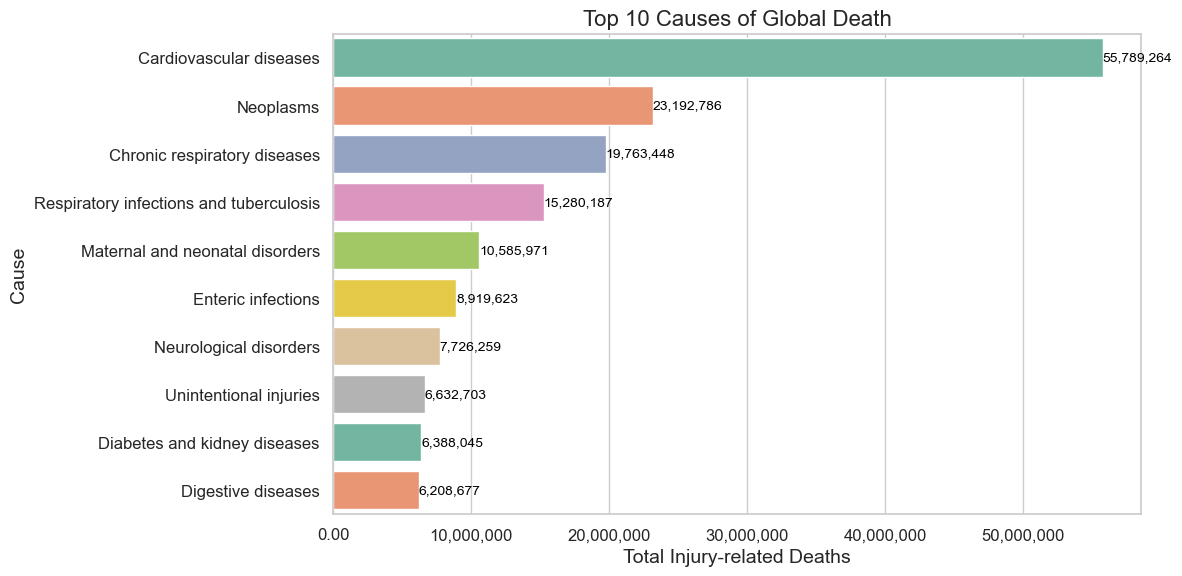

In [56]:
top_causes = df2.groupby('cause_name')['val_injury_death'].sum().sort_values(ascending=False).head(10)
plot_df = top_causes.reset_index().rename(columns={'val_injury_death': 'Deaths'})
ax = sns.barplot(data=plot_df, x='Deaths', y='cause_name', hue='cause_name', palette="Set2", legend=False)
plt.title("Top 10 Causes of Global Death")
plt.xlabel("Total Injury-related Deaths")
plt.ylabel("Cause")
plt.grid(True, axis='x')
ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x:,.0f}' if x > 1 else f'{x:.2f}'))
for i, value in enumerate(plot_df['Deaths']):
    ax.text(value, i, f'{value:,.0f}' if value > 1 else f'{value:.2f}', 
            va='center', ha='left', fontsize=10, color='black')

plt.tight_layout()
plt.show()

Trend of Healthy Life Expectancy (HALE)

This line chart shows how the average healthy life expectancy (HALE) has changed over the years for males and females. 

It helps us understand if people are living longer and healthier lives. 

If the lines go up, it means people are living in good health for more years. If they go down, it means health is getting worse.

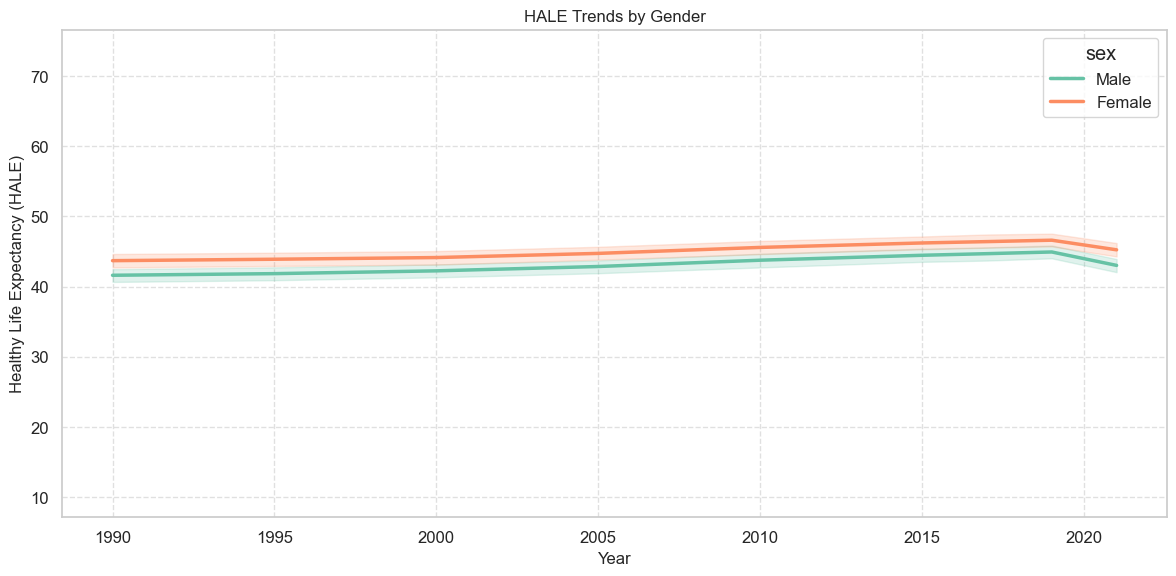

In [59]:
df4['sex'] = df4['sex_id'].replace({'1': 'Male', '2': 'Female', '3': 'Both'})
sns.lineplot(data=df4, x='year', y='val_hale', hue='sex', linewidth=2.5)
plt.title("HALE Trends by Gender", fontsize=12)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Healthy Life Expectancy (HALE)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.ylim(df4['val_hale'].min() - 2, df4['val_hale'].max() + 2)

plt.tight_layout()
plt.show()

Probability of Death by Country

This bar chart shows the countries where people have the highest chance of dying.

It helps us find out which countries are facing more serious health problems.

The taller the bar, the higher the risk of death in that country.

In [62]:
df6.columns

Index(['location_id', 'year', 'sex_id', 'age_id', 'val_death_prob'], dtype='object')

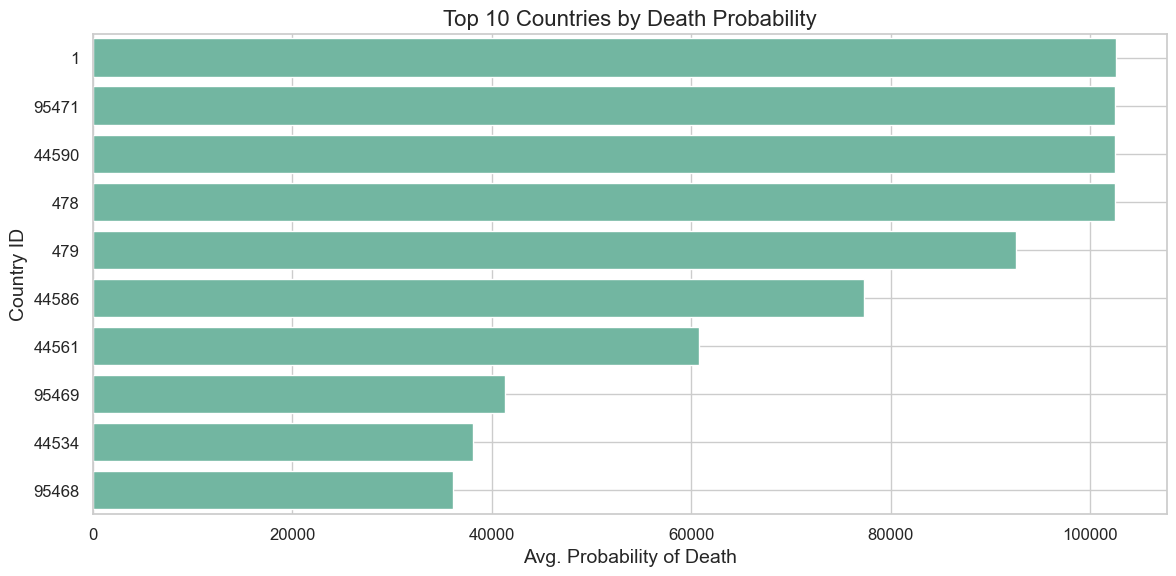

In [63]:
top_countries = df6.groupby('location_id')['val_death_prob'].mean().sort_values(ascending=False).head(10)

sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title("Top 10 Countries by Death Probability")
plt.xlabel("Avg. Probability of Death")
plt.ylabel("Country ID")
plt.tight_layout()
hue ='sex_name'
plt.grid(True)
plt.show()

Impairment Trend Over Time

This line chart shows how health problems or disabilities (called impairments) have changed over time.

It helps us see if more people are living with impairments now compared to before.

If the line goes up, it means impairments are increasing. If it goes down, it means things are improving.

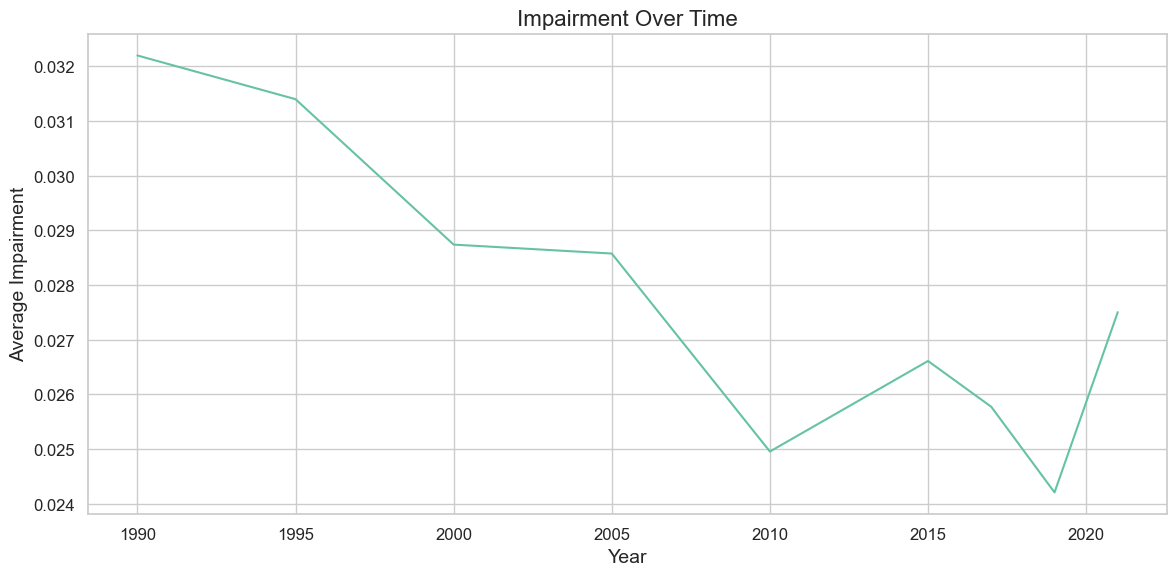

In [66]:
df5_grouped = df5.groupby('year')['val_impairment'].mean()
sns.lineplot(x=df5_grouped.index, y=df5_grouped.values)
plt.title("Impairment Over Time")
plt.xlabel("Year")
plt.ylabel("Average Impairment")
plt.grid(True)
plt.tight_layout()
plt.show()

Gender Gap in All-Cause Mortality

This chart shows the difference in death rates between males and females.

It helps us understand if one gender is dying more than the other.

If one box is higher, it means that group has more deaths on average.

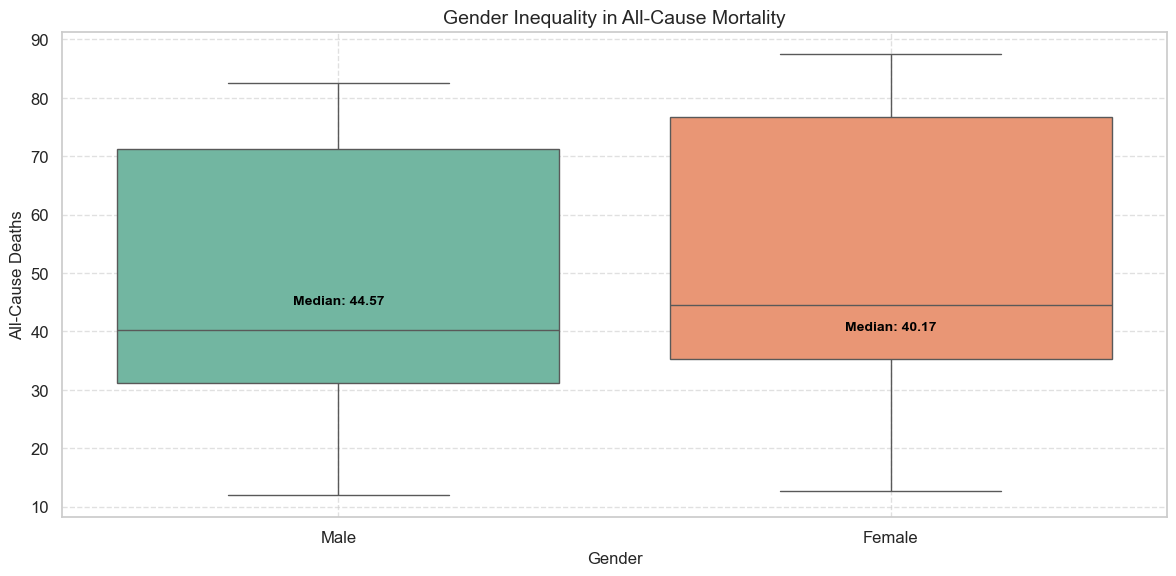

In [69]:
df1['sex'] = df1['sex_id'].replace({'1': 'Male', '2': 'Female', '3': 'Both'}).astype(str)
ax = sns.boxplot(data=df1, x='sex', y='val_all_cause', hue='sex', palette='Set2', legend=False)
plt.title("Gender Inequality in All-Cause Mortality", fontsize=14)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("All-Cause Deaths", fontsize=12)
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x:,.0f}'))
medians = df1.groupby('sex')['val_all_cause'].median()
for i, sex in enumerate(medians.index):
    plt.text(i, medians[sex], f"Median: {medians[sex]:.2f}",
             horizontalalignment='center', fontweight='bold', color='black', fontsize=10)

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Share of Injury-Related Deaths by Cause

This pie chart shows what percentage of injury related deaths come from different causes.

It helps us see which causes are the biggest and which are smaller.

Bigger slices mean that cause is responsible for more deaths.

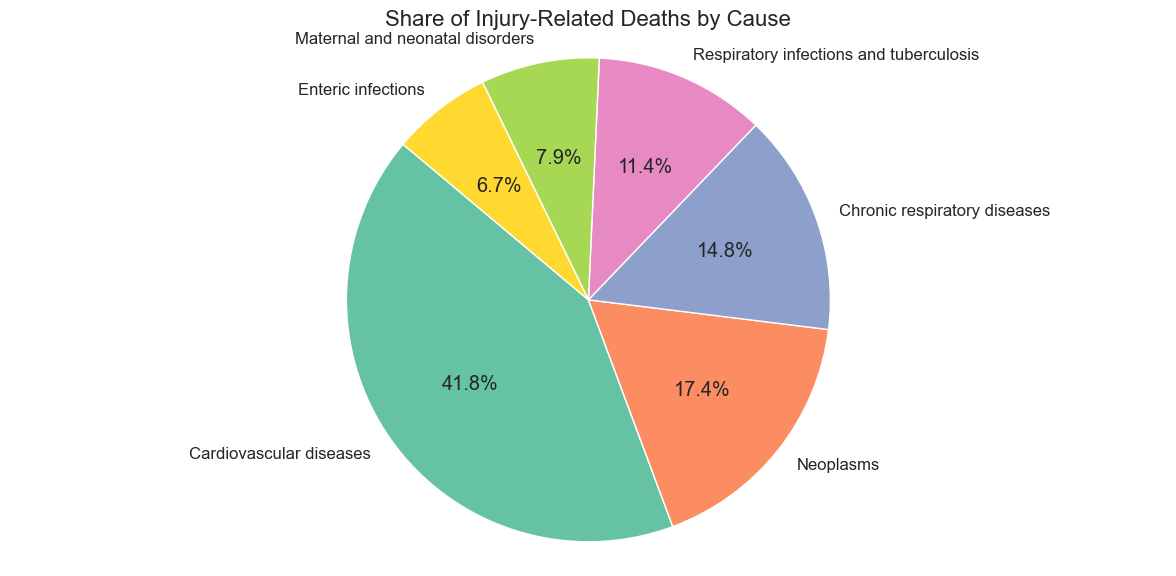

In [72]:
cause_share = df2.groupby('cause_name')['val_injury_death'].sum().sort_values(ascending=False).head(6)
colors = sns.color_palette('Set2', len(cause_share))
plt.pie(cause_share.values, labels=cause_share.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title("Share of Injury-Related Deaths by Cause")
plt.axis('equal')  
plt.tight_layout()
plt.show()

This bar chart shows the most harmful risk factors based on total health burden.  
Smoking, air pollution, and poor diet are among the top risks affecting millions worldwide.

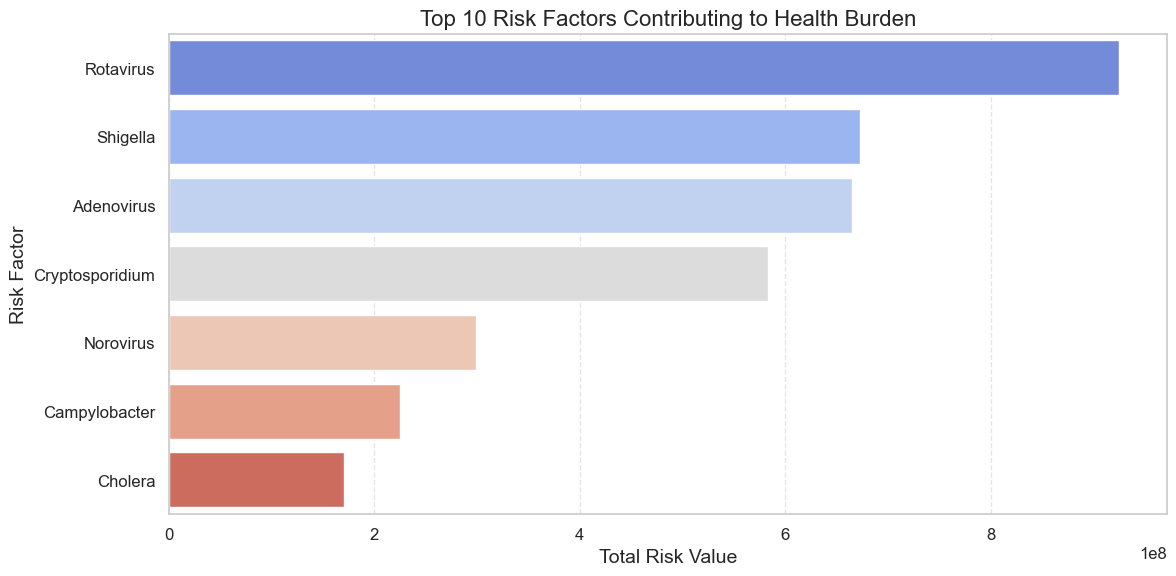

In [124]:
df = pd.read_csv('/Users/ajaypunia/Desktop/Project_1_EDA/merged_dataset/final_merged_dataset.csv', low_memory=False)
risk_df = df[['rei_name', 'val_risk']].dropna()
top_risks = (risk_df.groupby('rei_name')['val_risk']
             .sum()
             .sort_values(ascending=False)
             .head(10))
plot_df = top_risks.reset_index().rename(columns={'val_risk': 'TotalRisk'})
sns.barplot(data=plot_df, x='TotalRisk', y='rei_name', hue='rei_name', palette='coolwarm', legend=False)

plt.title("Top 10 Risk Factors Contributing to Health Burden")
plt.xlabel("Total Risk Value")
plt.ylabel("Risk Factor")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Which Health Risks Are Linked to More Deaths?

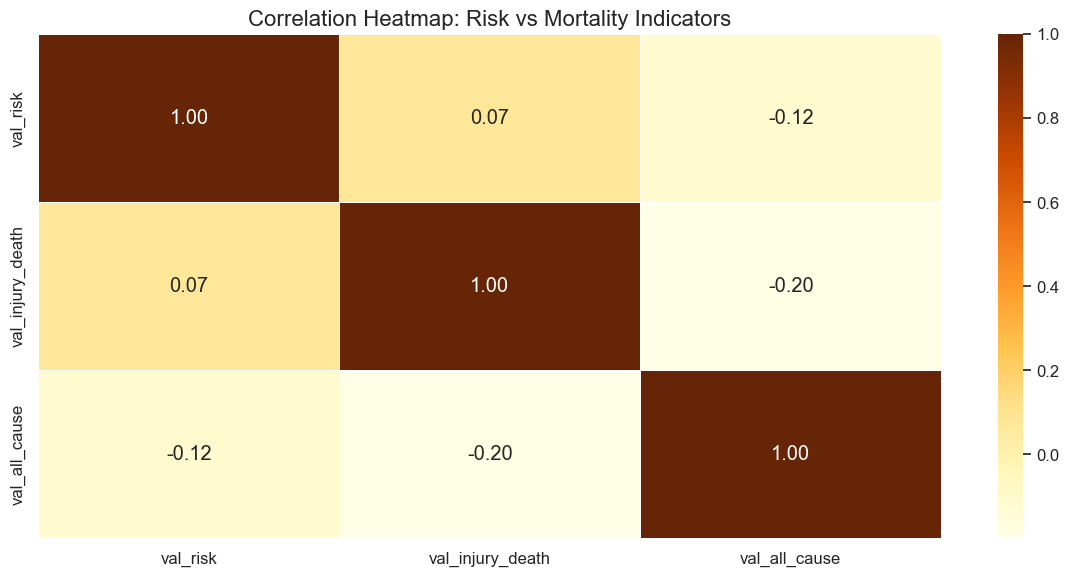

In [76]:
corr_df = df[['val_risk', 'val_injury_death', 'val_all_cause']].dropna(how='all')
corr_df = corr_df.fillna(0)
corr_matrix = corr_df.corr()

sns.heatmap(corr_matrix, annot=True, cmap='YlOrBr', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap: Risk vs Mortality Indicators")
plt.tight_layout()
plt.show()

In this project, we looked at real health data to understand how and why people die in different parts of the world.

We made 7 different graphs to answer questions like what are the top causes of death, how health has changed over time, and who is more affected — males or females.

We cleaned the data, looked at the numbers, and made easy-to-read charts.

This helped us learn more about health problems and how we can try to make things better in the future.